This question I want to get from this dataset are:
- Total types of the real estate that exist in the dataset
- Total types of the real estate in specific location

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
import pandas as pd
from pandas import json_normalize
import json
import re
import itertools

In [26]:
def load_data(title):
    with open(title,encoding='utf-8') as f:
        return json.load(f)

In [29]:
realestate_kh = "./realestate_kh_cleaner2023-06-19.json"
realestate_kh_list = load_data(realestate_kh)

In [30]:
df2 = json_normalize(realestate_kh_list)
df2

,location,price,bedrooms,bathrooms,floors,lands,realestate_category,type,link
0,"Veal Sbov, Chbar Ampov, Phnom Penh",236000,8,10,None,None,Shophouse,buy,https://www.realestate.com.kh/buy/veal-sbov/8-...
1,"Tonle Bassac, Chamkarmon, Phnom Penh",840403,3,3,None,None,Condo,buy,https://www.realestate.com.kh/buy/tonle-bassac...
2,"Koh Dach, Chroy Changvar, Phnom Penh",150,None,None,None,792,Land,buy,https://www.realestate.com.kh/buy/koh-dach/lan...
3,"Ream, Prey Nob, Sihanoukville",1150000,3,5,704,None,Penthouse,buy,https://www.realestate.com.kh/buy/ream/3-bed-5...
4,"Chey Chumneah, Daun Penh, Phnom Penh",52000,1,1,35,None,Apartment,buy,https://www.realestate.com.kh/buy/chey-chumnea...
...,...,...,...,...,...,...,...,...,...
1995,"Daun Penh, Phnom Penh",700,None,None,None,None,House,rent,https://www.realestate.com.kh/rent/daun-penh/h...
1996,"Daun Penh, Phnom Penh",700,None,None,None,None,House,rent,https://www.realestate.com.kh/rent/daun-penh/h...
1997,"Daun Penh, Phnom Penh",1100,None,None,None,None,Serviced,rent,https://www.realestate.com.kh/rent/daun-penh/s...
1998,"BKK 3, Chamkarmon, Phnom Penh",500,None,None,None,None,Apartment,rent,https://www.realestate.com.kh/rent/bkk-3/apart...


## Exploring the data

### Get category type data

In [31]:
realestate_type = []

# loop to get cate into one array 
# for cate in realestate_kh_list:
#     print(cate['type'])
# since have duplicates we want to remo|ve it.
# sources : https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
seen = set()
for realestate in realestate_kh_list:
    if realestate['realestate_category'] not in seen and realestate['realestate_category'] != None and realestate['realestate_category'] != re.search("POA", (realestate['realestate_category'])):
        realestate_type.append(realestate['realestate_category'])
        seen.add(realestate['realestate_category'])

realestate_type.remove('CondoPOA')
realestate_type.remove('LandPOA')
# realestate_type.remove('Serviced Apartment')
# realestate_type.remove('Residential Property')
realestate_type
         

['Shophouse',
 'Condo',
 'Land',
 'Penthouse',
 'Apartment',
 'Twin',
 'Project',
 'Borey',
 'Villa',
 'Link',
 'House',
 'Studio',
 'Flat',
 'PenthousePOA',
 'Serviced']

In [32]:
categoryArr = []
for item in realestate_kh_list:
    categoryArr.append(item['realestate_category'])


realestate_type_counts = {i:categoryArr.count(i) for i in categoryArr}

realestate_type_counts.pop(None)
realestate_type_counts.pop('CondoPOA')
realestate_type_counts.pop('LandPOA')
# realestate_type_counts.pop('Serviced Apartment')
# realestate_type_counts.pop('Residential Property')

realestate_type_counts

{'Shophouse': 94,
 'Condo': 246,
 'Land': 198,
 'Penthouse': 8,
 'Apartment': 602,
 'Twin': 48,
 'Project': 8,
 'Borey': 2,
 'Villa': 211,
 'Link': 19,
 'House': 415,
 'Studio': 12,
 'Flat': 57,
 'PenthousePOA': 1,
 'Serviced': 73}

## Total realestate_type compare from one to another

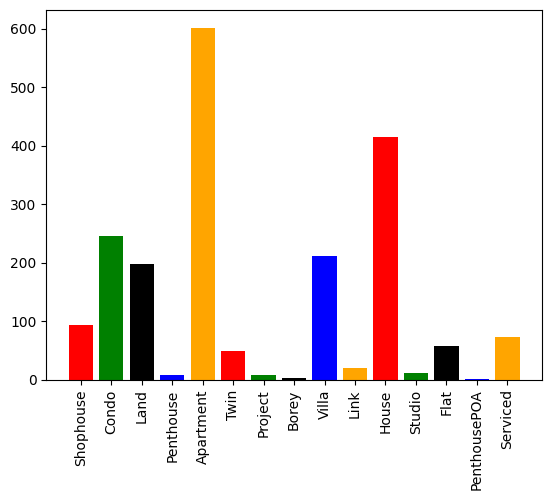

In [33]:
heights = list(realestate_type_counts.values())
bars = realestate_type
y_pos = range(len(bars))
c = ['red', 'green', 'black', 'blue', 'orange']

# Rotation of the bars names
plt.xticks(y_pos, bars,rotation=90)
plt.bar(y_pos, heights,color=c)

plt.savefig('total_type_realestate_type.png')



## Type of total real estate in the data set

In [34]:
df = pd.DataFrame(realestate_kh_list)


# df.groupby('type').count()

df['type'].value_counts()


type
buy     1000
rent    1000
Name: count, dtype: int64

In [35]:
print(df['location'].value_counts())

location
BKK 1, Chamkarmon, Phnom Penh                130
Tonle Bassac, Chamkarmon, Phnom Penh          98
Toul Tum Poung 1, Chamkarmon, Phnom Penh      59
 Svay Dankum, Siem Reap, Siem Reap            57
Svay Dankum, Siem Reap, Siem Reap             53
                                            ... 
Srae Chea Khang Tboung, Dang Tong, Kampot      1
Kaoh Rung, Sihanoukville, Sihanoukville        1
Dei Edth, Kien Svay, Kandal                    1
Svay Por, Battambang, Battambang               1
Khsach Kandal, Kandal                          1
Name: count, Length: 377, dtype: int64


## Total realestate_type compare from one to another base in city or province

In [36]:
# function for finding realestate at all locatios
import collections
def count_realestate_and_location(location_name):
    realestate_location_type = {}
    list_realestate = []
    for item in realestate_kh_list:
        if item['location'] == location_name:
            list_realestate.append(item['realestate_category'])
    realestate_location_type = {i:list_realestate.count(i) for i in list_realestate}
    if None in realestate_location_type:
        realestate_location_type.pop(None)
    if 'CondoPOA' in realestate_location_type:
        realestate_location_type.pop('CondoPOA')
    if 'Residential Property' in realestate_location_type:
        realestate_location_type.pop('Residential Property')
    if 'LandPOA' in realestate_location_type:
        realestate_location_type.pop('LandPOA')
    if 'Serviced Apartment' in realestate_location_type:
        realestate_location_type.pop('Serviced Apartment')
    for realestate_type_check in realestate_type:

        if realestate_type_check in realestate_location_type.keys():
            pass
        else:
            realestate_location_type[realestate_type_check] =  0
    if realestate_location_type:
        result = []
        for item in realestate_location_type.values():
              result.append(int(item))
        result.insert(0, location_name)
        return result


        
count_realestate_and_location('Tonle Bassac, Chamkarmon, Phnom Penh')
# realestate_type
# 'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa','Penthouse','Serviced'

['Tonle Bassac, Chamkarmon, Phnom Penh',
 25,
 1,
 21,
 2,
 45,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [10]:
count_realestate_and_location('Kampong Cham')


['Kampong Cham', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
# get location to list

locationArr = ['Banteay Meanchey','Battambang','Kampong Cham','Kampong Chhnang','Kampong Speu','Kampong Thom','Kampot','Kandal','Koh Kong','Kratié','Mondulkiri','Phnom Penh','Preah Vihear','Prey Veng','Pursat','Ratanakiri','Siem Reap','Preah Sihanouk','Stung Treng','Svay Rieng','Takéo','Oddar Meanchey','Kep','Pailin','Tboung Khmum']
location_count_with_realestate_type = []
for location in locationArr:
    # print("".join(str(count_realestate_and_location(location))))
    data = (count_realestate_and_location(location))
    print(data)
    location_count_with_realestate_type.append(data)
location_count_with_realestate_type

[130, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[59, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[53, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[31, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[[130, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [59, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [53, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [51, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [31, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [20, 0, 0,

## All the data set combine rent and sell

In [21]:
col = ["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa','Penthouse','Serviced']
df0=pd.DataFrame([location_count_with_realestate_type[0]],columns=col)
df1=pd.DataFrame([location_count_with_realestate_type[1]],columns=col)
df2=pd.DataFrame([location_count_with_realestate_type[2]],columns=col)
df3=pd.DataFrame([location_count_with_realestate_type[3]],columns=col)
df4=pd.DataFrame([location_count_with_realestate_type[4]],columns=col)
df5=pd.DataFrame([location_count_with_realestate_type[5]],columns=col)
df6=pd.DataFrame([location_count_with_realestate_type[6]],columns=col)
df7=pd.DataFrame([location_count_with_realestate_type[7]],columns=col)
df8=pd.DataFrame([location_count_with_realestate_type[8]],columns=col)
df9=pd.DataFrame([location_count_with_realestate_type[9]],columns=col)
df10=pd.DataFrame([location_count_with_realestate_type[10]],columns=col)
df11=pd.DataFrame([location_count_with_realestate_type[11]],columns=col)
df12=pd.DataFrame([location_count_with_realestate_type[12]],columns=col)
df13=pd.DataFrame([location_count_with_realestate_type[13]],columns=col)
df14=pd.DataFrame([location_count_with_realestate_type[14]],columns=col)
df15=pd.DataFrame([location_count_with_realestate_type[15]],columns=col)
df16=pd.DataFrame([location_count_with_realestate_type[16]],columns=col)
df17=pd.DataFrame([location_count_with_realestate_type[17]],columns=col)
df18=pd.DataFrame([location_count_with_realestate_type[18]],columns=col)
df19=pd.DataFrame([location_count_with_realestate_type[19]],columns=col)
df20=pd.DataFrame([location_count_with_realestate_type[20]],columns=col)
df21=pd.DataFrame([location_count_with_realestate_type[21]],columns=col)
df22=pd.DataFrame([location_count_with_realestate_type[22]],columns=col)
df23=pd.DataFrame([location_count_with_realestate_type[23]],columns=col)
df24=pd.DataFrame([location_count_with_realestate_type[24]],columns=col)


fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 30))
fig.tight_layout()

#add DataFrames to subplots
yCol = ['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa','Penthouse','Serviced']
df0.plot(ax=axes[0,0],x="Location",y=yCol, kind="bar",rot=0)
df1.plot(ax=axes[0,1],x="Location",y=yCol, kind="bar",rot=0)
df2.plot(ax=axes[0,2],x="Location",y=yCol, kind="bar",rot=0)
df3.plot(ax=axes[0,3],x="Location",y=yCol, kind="bar",rot=0)

df4.plot(ax=axes[1,0],x="Location",y=yCol, kind="bar",rot=0)
df5.plot(ax=axes[1,1],x="Location",y=yCol, kind="bar",rot=0)
df6.plot(ax=axes[1,2],x="Location",y=yCol, kind="bar",rot=0)
df7.plot(ax=axes[1,3],x="Location",y=yCol, kind="bar",rot=0)

df8.plot(ax=axes[2,0],x="Location",y=yCol, kind="bar",rot=0)
df9.plot(ax=axes[2,1],x="Location",y=yCol, kind="bar",rot=0)
df10.plot(ax=axes[2,2],x="Location",y=yCol, kind="bar",rot=0)
df11.plot(ax=axes[2,3],x="Location",y=yCol, kind="bar",rot=0)


df12.plot(ax=axes[3,0],x="Location",y=yCol, kind="bar",rot=0)
df13.plot(ax=axes[3,1],x="Location",y=yCol, kind="bar",rot=0)
df14.plot(ax=axes[3,2],x="Location",y=yCol, kind="bar",rot=0)
df15.plot(ax=axes[3,3],x="Location",y=yCol, kind="bar",rot=0)

df16.plot(ax=axes[4,0],x="Location",y=yCol, kind="bar",rot=0)
df17.plot(ax=axes[4,1],x="Location",y=yCol, kind="bar",rot=0)
df18.plot(ax=axes[4,2],x="Location",y=yCol, kind="bar",rot=0)
df19.plot(ax=axes[4,3],x="Location",y=yCol, kind="bar",rot=0)

df20.plot(ax=axes[5,0],x="Location",y=yCol, kind="bar",rot=0)
df21.plot(ax=axes[5,1],x="Location",y=yCol, kind="bar",rot=0)
df22.plot(ax=axes[5,2],x="Location",y=yCol, kind="bar",rot=0)
df23.plot(ax=axes[5,3],x="Location",y=yCol, kind="bar",rot=0)

df24.plot(ax=axes[6,0],x="Location",y=yCol, kind="bar",rot=0)

# Show
plt.savefig('viz.png')
plt.show()


ValueError: 15 columns passed, passed data had 16 columns

## Average price of type of real estate

In [13]:
df.groupby('realestate_category')['price'].mean()

realestate_category
Apartment     27055.562290
Borey         92500.000000
Condo        163147.890152
CondoPOA          0.000000
Flat         140006.000000
House        189751.118881
Land         760952.482353
LandPOA           0.000000
Link         117735.000000
Penthouse      4900.000000
Project       85410.500000
Serviced       1675.304878
Shophouse    363214.795918
Studio        22568.750000
Twin         263174.958333
Villa        545747.611940
Name: price, dtype: float64

In [197]:
min_max_type = []
def draw_each_city_or_provice(state_name):
    dfPP=pd.DataFrame(df.loc[df['location'] == state_name])
    
    ax = dfPP['realestate_category'].value_counts().plot(kind='bar',
                                        figsize=(5,5),
                                        title="Number Each Real Estate type")
    ax.set_xlabel("Real Estate type")
    ax.set_ylabel("Total")
    print(dfPP.groupby('realestate_category')['price'].describe().apply(lambda x: x.apply('{0:.5f}'.format)))

                         count           mean            std          min   
realestate_category                                                         
Apartment            460.00000    21830.90217   178098.10279    250.00000  \
Borey                  2.00000    92500.00000   130814.75452      0.00000   
Condo                254.00000   166501.70079   575722.53049    170.00000   
CondoPOA               1.00000        0.00000            nan      0.00000   
Flat                  50.00000   153500.40000   194642.68534    150.00000   
House                220.00000   209637.94091   359635.33649    200.00000   
Land                  57.00000  1248259.15789  3111303.93901     59.00000   
Link                  16.00000   134293.75000   106237.50417    500.00000   
Penthouse              4.00000     5000.00000     1998.33264   2700.00000   
Project                5.00000    87892.60000    24743.05373  60067.00000   
Serviced              78.00000     1727.88462     1908.30065    250.00000   

""


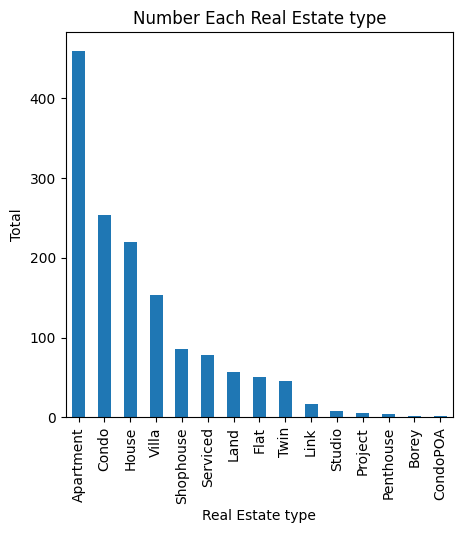

In [198]:
draw_each_city_or_provice('Phnom Penh')
newPd = pd.DataFrame(min_max_type)
newPd

                         count          mean           std          min   
realestate_category                                                       
Apartment            104.00000   17168.55769  101348.90230    100.00000  \
Condo                  4.00000  103989.00000   54132.67801  60000.00000   
Flat                   7.00000     167.14286      62.37368    100.00000   
House                126.00000  167189.89683  300915.48774    150.00000   
Land                  44.00000  399662.31818  858699.87132     13.00000   
Serviced               2.00000     350.00000      70.71068    300.00000   
Shophouse              5.00000  446120.00000  759429.89933    600.00000   
Twin                   2.00000  101500.00000   33234.01872  78000.00000   
Villa                 30.00000  273533.33333  504602.94007    300.00000   

                              25%           50%           75%            max  
realestate_category                                                           
Apartment       

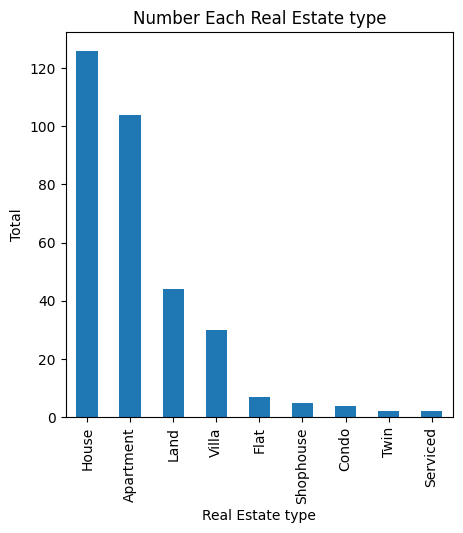

In [201]:
draw_each_city_or_provice('Siem Reap')